In [1]:
import pandas as pd
from pathlib import Path
import matplotlib.pyplot as plt
from PIL import Image
import random

## Load and Inspect Metadata

In [2]:
root = Path("/Users/samuel.omole/OneDrive - Science and Technology Facilities Council/Stanford_Online_Products")

train_df = pd.read_csv(
    root / "Ebay_train.txt",
    sep=" ",
)

test_df = pd.read_csv(
    Path(root) / "Ebay_test.txt",
    sep=" ",
)
print(f"Train set with length {len(train_df)}: ")
print(train_df.head())
print(f"\nTest set with length {len(test_df)}: ")
print(test_df.head())

Train set with length 59551: 
   image_id  class_id  super_class_id                              path
0         1         1               1  bicycle_final/111085122871_0.JPG
1         2         1               1  bicycle_final/111085122871_1.JPG
2         3         1               1  bicycle_final/111085122871_2.JPG
3         4         1               1  bicycle_final/111085122871_3.JPG
4         5         1               1  bicycle_final/111085122871_4.JPG

Test set with length 60502: 
   image_id  class_id  super_class_id                              path
0     59552     11319               1  bicycle_final/251952414262_0.JPG
1     59553     11319               1  bicycle_final/251952414262_1.JPG
2     59554     11319               1  bicycle_final/251952414262_2.JPG
3     59555     11319               1  bicycle_final/251952414262_3.JPG
4     59556     11319               1  bicycle_final/251952414262_4.JPG


## Map Category IDs to Product Names

In [14]:
categories = sorted([p.name for p in root.glob("*_final")])
categories

['bicycle_final',
 'cabinet_final',
 'chair_final',
 'coffee_maker_final',
 'fan_final',
 'kettle_final',
 'lamp_final',
 'mug_final',
 'sofa_final',
 'stapler_final',
 'table_final',
 'toaster_final']

In [4]:
category_to_id = {name.replace("_final", ""): i+1 
                  for i, name in enumerate(categories)}

id_to_category = {v: k for k, v in category_to_id.items()}

id_to_category

{1: 'bicycle',
 2: 'cabinet',
 3: 'chair',
 4: 'coffee_maker',
 5: 'fan',
 6: 'kettle',
 7: 'lamp',
 8: 'mug',
 9: 'sofa',
 10: 'stapler',
 11: 'table',
 12: 'toaster'}

## Filter to the 5 Chosen Categories

In [5]:
chosen_categories = {
    category_to_id["stapler"],
    category_to_id["toaster"],
    category_to_id["kettle"],
    category_to_id["coffee_maker"],
    category_to_id["lamp"],
}

train_df = train_df[train_df["super_class_id"].isin(chosen_categories)]
test_df  = test_df[test_df["super_class_id"].isin(chosen_categories)]

print(f"Subset train set has length {len(train_df)}")
print(f"Subset train set has length {len(test_df)}")

Subset train set has length 25024
Subset train set has length 24416


## Verify Image Paths Exist in Dataset

In [6]:
def check_paths(df):
    missing = []
    for p in df["path"]:
        if not Path(root / p).exists():
            missing.append(p)
    return missing

missing_train = check_paths(train_df)
missing_test  = check_paths(test_df)

print("Missing train images:", len(missing_train))
print("Missing test images:", len(missing_test))

Missing train images: 0
Missing test images: 0


## Visually Verify Sample Images

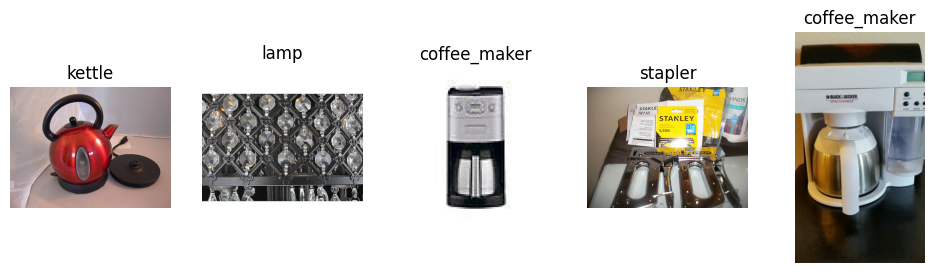

In [9]:
def show_samples(df, n=5):
    sample = df.sample(n)
    plt.figure(figsize=(12, 3))
    for i, row in enumerate(sample.itertuples(), 1):
        img = Image.open(root / row.path)
        category = id_to_category[row.super_class_id]
        plt.subplot(1, n, i)
        plt.imshow(img)
        plt.title(category)
        plt.axis("off")
    plt.show()

show_samples(train_df, n=5)
